**Introduction**

Traversal of the space of train/test splits #3


**References:**
1. https://scikit-learn.org

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
pd.set_option("display.precision", 2) 

In [2]:
df = pd.read_csv("../../datasets/vehicles.csv")

In [3]:
feature_cols = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR']
label_col = ['Class']

**Removing Outlier Rows**

Based on the above graph, we have the max values for each feature that have outliers. We will remove all the rows that have outliers because outliers in data can result in inaccurate models.

There are 51 rows with outliers out of 846 rows.

In [4]:
# Max value based on boxplot to filter outliers of 8 columns where outliers are identified. 
df_columns_with_outliers = pd.DataFrame([[255, 77, 13, 288, 980, 88, 19, 40]], columns=['RADIUS_RATIO', 
                                                                                'PR.AXIS_ASPECT_RATIO', 
                                                                                'MAX.LENGTH_ASPECT_RATIO', 
                                                                                'SCALED_VARIANCE_MAJOR', 
                                                                                'SCALED_VARIANCE_MINOR', 
                                                                                'SKEWNESS_ABOUT_MAJOR', 
                                                                                'SKEWNESS_ABOUT_MINOR', 
                                                                                'KURTOSIS_ABOUT_MAJOR'])

total_outliers = 0
for i, column in enumerate(df_columns_with_outliers.columns):
    total_outliers += df[column][df[column] > df_columns_with_outliers[column][0]].size
print(len(df.index))
print('Total Outliers ', total_outliers)

846
Total Outliers  51


In [5]:
df_new = df.copy();

# Fill null
df_new.fillna(df_new.mean(), inplace=True)

# Remove outliers based on max value identified earlier from boxplot
for i, column in enumerate(df_columns_with_outliers.columns):
    df_new = df_new[df_new[column] < df_columns_with_outliers[column][0]]
 
df_new['Class'] = pd.Categorical(df_new['Class']).codes

# rest the index post cleaning the outliers
df_new = df_new.reset_index(drop=True)

In [6]:
from sklearn.svm import SVC # SVM Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 

def train_svm_with_hyperparameter_tuning(X, y, param_grid, ratio = 0.3):
    """ This function takes train data, labels as input and trains the SVM model.
    The function uses GridSearchCV for hyperparameter tuning for SVM
    
    Args:
        X: Training Data(features columns).
        y: Labels for each row
        param_grid (json): params for GridSearchCV (c, gamma, kernel)
        ratio: (optional) Split ratio for train and test data
    Returns:
        tuple: y_test, y_pred values
    """
    
    ## Split the train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, random_state = 1)

    svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
    svm_grid.fit(X_train, y_train) 
    y_pred = svm_grid.predict(X_test) 
    
    return y_test, y_pred   

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
    

X_new = df_new[feature_cols]
y_new = df_new[label_col]
scaler_sc = MinMaxScaler()
scaler_sc.fit(X_new)
X_new = scaler_sc.transform(X_new)

# Parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
result_lst = list()

for i in range(10, 100, 10):
    test_size = round(i/100 , 2)
    train_size = round(1 - test_size, 2)
    print(train_size, test_size)
    #y_test, y_pred = train_svm_with_hyperparameter_tuning(X_new, y_new.values.ravel(), param_grid, i/100)
    #result_lst.append([train_size, test_size, metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average='weighted')])


0.9 0.1
0.8 0.2
0.7 0.3
0.6 0.4
0.5 0.5
0.4 0.6
0.3 0.7
0.2 0.8
0.1 0.9


In [16]:
result_df = pd.DataFrame(result_lst, columns = ['Ratio(Test Data)', 'Ratio(Train Data)', 'Accuracy', 'F1-Score']) 

In [17]:
result_df

,Ratio(Test Data),Ratio(Train Data),Accuracy,F1-Score
0,0.9,0.1,0.73,0.73
1,0.8,0.2,0.78,0.77
2,0.7,0.3,0.83,0.82
3,0.6,0.4,0.78,0.78
4,0.5,0.5,0.77,0.76
5,0.4,0.6,0.75,0.75
6,0.3,0.7,0.75,0.75
7,0.2,0.8,0.68,0.59
8,0.1,0.9,0.71,0.71


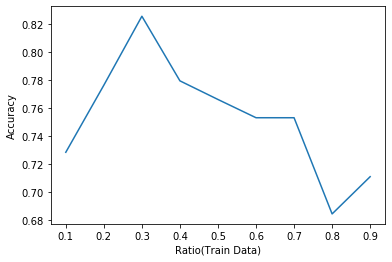

In [18]:
sns.lineplot(data=result_df, x='Ratio(Train Data)',y='Accuracy')

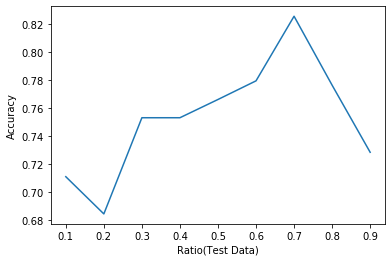

In [19]:
sns.lineplot(data=result_df, x='Ratio(Test Data)',y='Accuracy')